In [14]:
%matplotlib inline
import tensorflow as tf
from matplotlib import pyplot as plt
import random

## 3.2.1 生成数据集 ##

In [15]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
# 生成X
features = tf.random.normal((num_examples, num_inputs), stddev=1)
# 生成y
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
# 加上噪声
labels += tf.random.normal(labels.shape, stddev=0.01)
# features的每一行是长度为2的向量，而lablels的每一行是一个长度为1的向量（标量）
features[0], features[1]

(<tf.Tensor: id=137, shape=(2,), dtype=float32, numpy=array([ 1.6079848, -0.9286133], dtype=float32)>,
 <tf.Tensor: id=141, shape=(2,), dtype=float32, numpy=array([ 0.37062067, -0.18103917], dtype=float32)>)

In [16]:
# 生成第二个特征features[:, 1]和标签labels的散点图

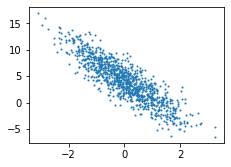

In [17]:
def set_figsize(figsize=(3.5, 2.5)):
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:,1], labels, 1)

## 3.2.2 读取数据 ##

In [18]:
# 定义一个函数，每次返回batch_size（批量大小）个随机样本的特征和标签
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = indices[i:min(i+batch_size, num_examples)]
        yield tf.gather(features, axis=0, indices=j), tf.gather(labels, axis=0, indices=j)

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tf.Tensor(
[[-1.0028057  -0.41222367]
 [ 0.47966215 -0.83622706]
 [-0.30938622 -0.67669743]
 [-2.1734796   0.3204702 ]
 [-1.4556819  -0.0547011 ]
 [ 0.30819705  0.985383  ]
 [-0.11084065  0.07565416]
 [ 1.3230127   0.37255317]
 [ 0.53105867  1.0027556 ]
 [ 0.4654879  -0.8935737 ]], shape=(10, 2), dtype=float32) tf.Tensor(
[ 3.581706   8.009217   5.883733  -1.2199974  1.4801451  1.4777434
  3.7276473  5.5894256  1.8450857  8.175532 ], shape=(10,), dtype=float32)


## 3.2.3 初始化模型参数 ##

In [19]:
# 权重初始化为均值为0、标准差为0.01的正太随机数，偏差初始化成0
w = tf.Variable(tf.random.normal((num_inputs, 1), stddev=0.01))
b = tf.Variable(tf.zeros((1,)))

## 3.2.4 定义模型 ##

In [20]:
def linreg(X,w, b):
    return tf.matmul(X, w) + b

## 3.2.5 定义损失函数 ##

In [21]:
def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2/2

## 3.2.6 定义优化算法 ##

In [22]:
# 梯度 = 一个样本的梯度和 / 批量大小
def sgd(params, lr, batch_size, grads):
    for i, param in enumerate(params):
        param.assign_sub(lr * grads[i] / batch_size)


## 3.2.7 训练模型 ##

In [23]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as t:
            t.watch([w,b])
            l = tf.reduce_sum(loss(net(X, w, b), y))
        grads = t.gradient(l, [w, b])
        sgd([w, b], lr, batch_size, grads)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, tf.reduce_mean(train_l)))

epoch 1, loss 0.037734
epoch 2, loss 0.000143
epoch 3, loss 0.000051
